In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Linear Array with Hydrophones at:
H0 = 0,0,0    H1 = 0.45,0,0    H2 = 0.9,0,0   

Timing difference on the first hydrophone is:

dsin(theta)/c 

So calculating theta based on the timing difference is:

Theta = sin^-1(c*deltaT/d)

We will model the reverse for now, theta varying and getting the time delay per hydrophone:

Theta goes from -45 to 45 degrees - DeltaT_i = idsin(theta)/c

In [170]:
c =  1500 #m/s
d = 0.45 #m
theta = np.arange(-45,45,1)
print(theta)

x1 = 1*d

x2 = 2*d

deltaT1 = x1*np.sin(theta*np.pi/180)/c
deltaT2 = x2*np.sin(theta*np.pi/180)/c
#deltaT3 = 3*d*np.sin(theta*np.pi/180)/c

[-45 -44 -43 -42 -41 -40 -39 -38 -37 -36 -35 -34 -33 -32 -31 -30 -29 -28
 -27 -26 -25 -24 -23 -22 -21 -20 -19 -18 -17 -16 -15 -14 -13 -12 -11 -10
  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7   8
   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26
  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44]


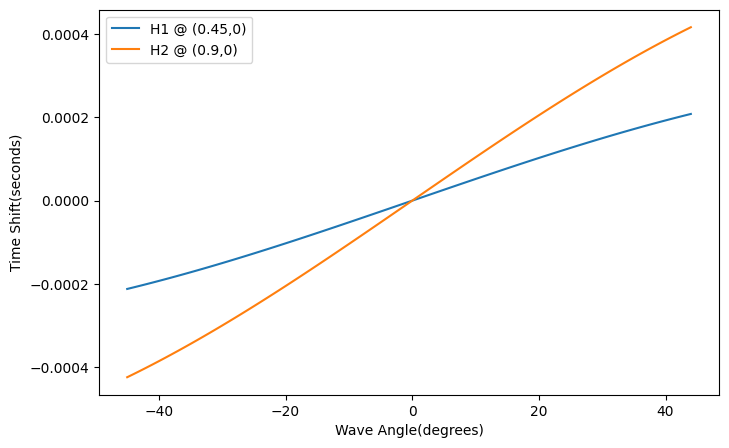

In [171]:
plt.figure(figsize = (8,5))
plt.plot(theta,deltaT1, label='H1 @ (0.45,0)')
plt.plot(theta,deltaT2, label='H2 @ (0.9,0)')
#plt.plot(theta,deltaT3, label='H1')
plt.xlabel('Wave Angle(degrees)')
plt.ylabel('Time Shift(seconds)')
plt.legend()
plt.savefig('LinearArray')

# Planar Array with Hydrophones at:
H0 = 0,0,0    H1 = 0.45,0,0    H2 = 0,0.45,0  

Timing difference on an arbitrary hydrophone is:

DeltaT_i = d_i sin(theta_i)/c

where d_i is the projected length of the hydrophone location vector on the plane wave propagation direct:

kx = sin(theta)
ky = cos(theta)

For the modeling here, we will calculate the time shifts as a function of the angle theta again.

Theta goes from -90 to 90 degrees 

In [172]:
c =  1500 #m/s
theta = np.arange(-90,90,1)

x_1 = 0.45
y_1 = 0

x_2 = 0
y_2 = 0.45

deltaT1 = x_1*np.sin(theta*np.pi/180)/c
deltaT2 = y_2*np.cos(theta*np.pi/180)/c

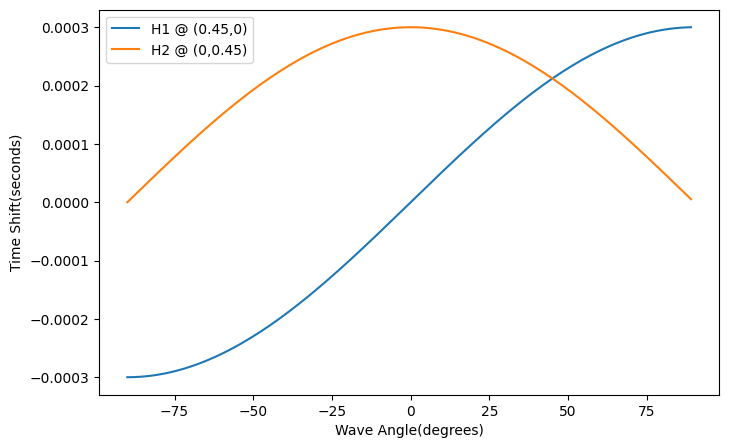

In [173]:
plt.figure(figsize = (8,5))
plt.plot(theta,deltaT1, label='H1 @ (0.45,0)')
plt.plot(theta,deltaT2, label='H2 @ (0,0.45)')
#plt.plot(theta,deltaT3, label='H1')
plt.xlabel('Wave Angle(degrees)')
plt.ylabel('Time Shift(seconds)')
plt.legend()
#plt.plot(theta,deltaT3, label='H1')
plt.savefig('PlanarArray')

# Three Dimensional Array

with hydrophones located at: H1 = (0,0,0)    H2 = (.45,0,0)    H3 =(0,.45,0)    H4 = (0,0,0.45)

With a plane wave incoming in the k-hat direction, the projection onto the cartesian coordinate would look like the following:

kx = sin(theta)cos(phi)
ky = cos(theta)cos(phi)
kz = sin(phi)



Thus, we can recreate the prior results simply by taking phi = 0 and taking the dot product of k-hat = kx, ky, kz onto the hydrophone vectors and dividing by c:


H1 only along x, phi = 0:

deltaT1 = dsin(theta)/c #like the linear and planar result

H2 only along y, phi = 0:

deltaT2 = dcos(theta)/c #like the planar result


Now lets leave in phi and vary it, getting a general solution for the deltaT per hydrophone:

deltaT_i = (x_i * cos(phi)sin(theta) + y_i * cos(phi)cos(theta)+z_i * sin(phi))/c



In [174]:
c =  1500 #m/s
theta = np.arange(-90,90,1)
phi = np.arange(-90,90,1)

x_1 = 0.45
y_1 = 0
z_1 = 0

x_2 = 0
y_2 = 0.45
z_2 = 0

x_3 = 0
y_3 = 0
z_3 = 0.45

deltaT1 = np.zeros((len(phi),len(theta)))
deltaT2 = np.zeros((len(phi),len(theta)))
deltaT3 = np.zeros((len(phi),len(theta)))

for i in np.arange(len(phi)):
    for j in np.arange(len(theta)):
        deltaT1[i,j] = (x_1*np.sin(theta[j]*np.pi/180)*np.cos(phi[i]*np.pi/180) + y_1*np.cos(theta[j]*np.pi/180)*np.cos(phi[i]*np.pi/180) + z_1*np.sin(phi[i]*np.pi/180))/c 
        deltaT2[i,j] = (x_2*np.sin(theta[j]*np.pi/180)*np.cos(phi[i]*np.pi/180) + y_2*np.cos(theta[j]*np.pi/180)*np.cos(phi[i]*np.pi/180) + z_2*np.sin(phi[i]*np.pi/180))/c 
        deltaT3[i,j] = (x_3*np.sin(theta[j]*np.pi/180)*np.cos(phi[i]*np.pi/180) + y_3*np.cos(theta[j]*np.pi/180)*np.cos(phi[i]*np.pi/180) + z_3*np.sin(phi[i]*np.pi/180))/c


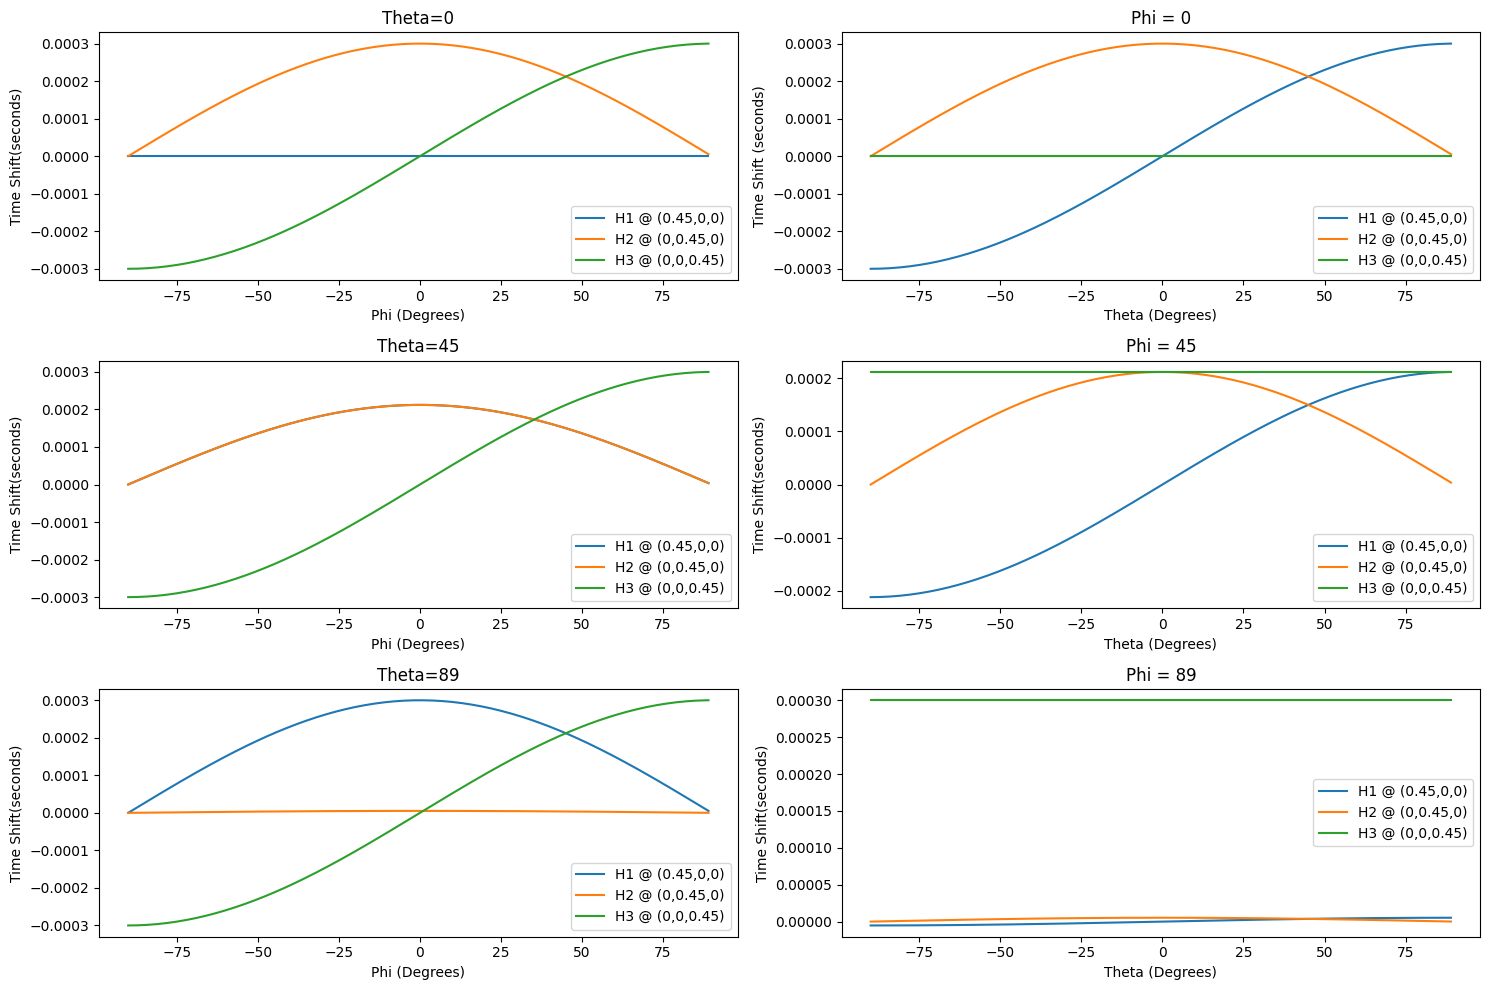

In [193]:
plt.figure(figsize=(15,10))

plt.subplot(3,2,2)
plt.title('Phi = 0')
indexPhi = 0 #in degrees
plt.plot(theta,deltaT1[indexPhi-phi[0]],label='H1 @ (0.45,0,0)')
plt.plot(theta,deltaT2[indexPhi-phi[0]],label='H2 @ (0,0.45,0)')
plt.plot(theta,deltaT3[indexPhi-phi[0]],label='H3 @ (0,0,0.45)')
plt.legend()
plt.xlabel('Theta (Degrees)')
plt.ylabel('Time Shift (seconds)')
plt.tight_layout()

plt.subplot(3,2,1)
plt.title('Theta=0')
indexTheta = 0
plt.plot(phi,deltaT1[:,indexTheta-theta[0]],label='H1 @ (0.45,0,0)')
plt.plot(phi,deltaT2[:,indexTheta-theta[0]],label='H2 @ (0,0.45,0)')
plt.plot(phi,deltaT3[:,indexTheta-theta[0]],label='H3 @ (0,0,0.45)')
plt.legend()
plt.xlabel('Phi (Degrees)')
plt.ylabel('Time Shift(seconds)')
plt.tight_layout()

plt.subplot(3,2,4)
plt.title('Phi = 45')
indexPhi = 45 #in degrees
plt.plot(theta,deltaT1[indexPhi-phi[0]],label='H1 @ (0.45,0,0)')
plt.plot(theta,deltaT2[indexPhi-phi[0]],label='H2 @ (0,0.45,0)')
plt.plot(theta,deltaT3[indexPhi-phi[0]],label='H3 @ (0,0,0.45)')
plt.legend()
plt.xlabel('Theta (Degrees)')
plt.ylabel('Time Shift(seconds)')
plt.tight_layout()

plt.subplot(3,2,3)
plt.title('Theta=45')
indexTheta = 45
plt.plot(phi,deltaT1[:,indexTheta-theta[0]],label='H1 @ (0.45,0,0)')
plt.plot(phi,deltaT2[:,indexTheta-theta[0]],label='H2 @ (0,0.45,0)')
plt.plot(phi,deltaT3[:,indexTheta-theta[0]],label='H3 @ (0,0,0.45)')
plt.legend()
plt.xlabel('Phi (Degrees)')
plt.ylabel('Time Shift(seconds)')
plt.tight_layout()

plt.subplot(3,2,6)
plt.title('Phi = 89')
indexPhi = 89 #in degrees
plt.plot(theta,deltaT1[indexPhi-phi[0]],label='H1 @ (0.45,0,0)')
plt.plot(theta,deltaT2[indexPhi-phi[0]],label='H2 @ (0,0.45,0)')
plt.plot(theta,deltaT3[indexPhi-phi[0]],label='H3 @ (0,0,0.45)')
plt.legend()
plt.xlabel('Theta (Degrees)')
plt.ylabel('Time Shift(seconds)')
plt.tight_layout()

plt.subplot(3,2,5)
plt.title('Theta=89')
indexTheta = 89
plt.plot(phi,deltaT1[:,indexTheta-theta[0]],label='H1 @ (0.45,0,0)')
plt.plot(phi,deltaT2[:,indexTheta-theta[0]],label='H2 @ (0,0.45,0)')
plt.plot(phi,deltaT3[:,indexTheta-theta[0]],label='H3 @ (0,0,0.45)')
plt.legend()
plt.xlabel('Phi (Degrees)')
plt.ylabel('Time Shift(seconds)')
plt.tight_layout()

plt.savefig('ThreeDimensionalArray')

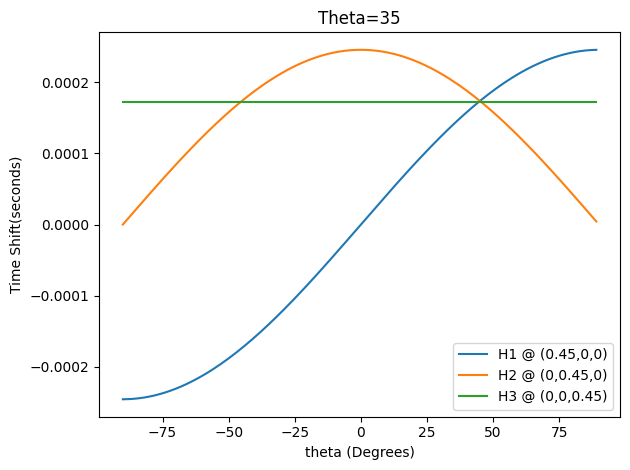

In [201]:
plt.figure()
plt.title('Theta=35')
indexPhi = 35
plt.plot(theta,deltaT1[indexPhi-phi[0]],label='H1 @ (0.45,0,0)')
plt.plot(theta,deltaT2[indexPhi-phi[0]],label='H2 @ (0,0.45,0)')
plt.plot(theta,deltaT3[indexPhi-phi[0]],label='H3 @ (0,0,0.45)')
plt.legend()
plt.xlabel('theta (Degrees)')
plt.ylabel('Time Shift(seconds)')
plt.tight_layout()

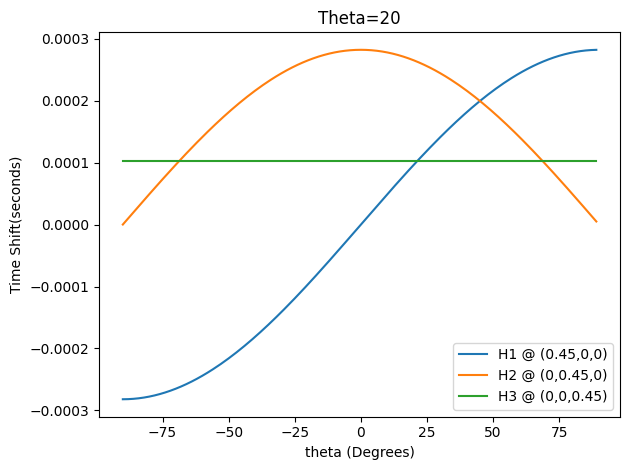

In [202]:
plt.figure()
plt.title('Theta=20')
indexPhi = 20
plt.plot(theta,deltaT1[indexPhi-phi[0]],label='H1 @ (0.45,0,0)')
plt.plot(theta,deltaT2[indexPhi-phi[0]],label='H2 @ (0,0.45,0)')
plt.plot(theta,deltaT3[indexPhi-phi[0]],label='H3 @ (0,0,0.45)')
plt.legend()
plt.xlabel('theta (Degrees)')
plt.ylabel('Time Shift(seconds)')
plt.tight_layout()